# Walk-forward GARCH(1,1)

## Objective
 This notebook applies a walk-forward GARCH(1,1) model on a few representative stocks from high- and low-clustering groups. We examine the model's ability to capture time-varying volatility and assess it through statistical and visual diagnostics.

## GARCH(1,1) model overview
The Generalized Autoregressive Conditional Heteroskedasticity model captures volatility clustering by modeling the conditional variance of returns. The return at time $𝑡$ is modeled as:
$$r_t=\mu+\epsilon_t, \quad \epsilon_t \sim N(0,\sigma_t^2)$$
where $\mu$ is the modeled mean return, and $\epsilon_t$ is the residual (shock). 

The conditional variance equation is
$$\sigma_t^2=\omega+\alpha\epsilon_{t-1}^2+\beta\sigma_{t-1}^2$$
where
- $\sigma_t^2$ is the conditional variance at time $t$,
- $\omega>=0$ is the long-run average variace,
- $\alpha>=0$ is the ARCH parameter (reaction to recent shocks),
- $\beta>=0$ is the GARCH parameter (persistence of past variance).

### Model diagnostics
To ensure that the model adequately captures time-varying volatility we analyze the standardized residuals and evolution of model parameters. 

The standardized residuals are calculated at each iteration of the walk-forward loop as $z_t=(r_t-\mu)/\sigma_t$. If the GARCH model is specified correctly then $z_t$ should have zero mean, constant variance (homoskedastic), be approximately IID (independent and identically distributed). Standardized resoduals often follow a standard normal or standardized t-distribution, depending on the distribution assumed in the model.

In the GARCH(1,1) model, the sum $\alpha+\beta$ measures the persistence of volatility. Values close to 1 indicate that volatility shocks decay slowly, which is consistent with the presence of volatility clustering — a key motivation for using GARCH models.

To verify that these assumptions hold for the fitted GARCH model, we perform the following statistical tests and visual diagnostics:

**Statistical tests**
- Ljung-Box Test: Tests for autocorrelation in residuals.
- ARCH Test: Checks for remaining conditional heteroskedasticity.
- Jarque-Bera Test:  Evaluates whether the residuals follow a normal distribution based on skewness and kurtosis.

**Visual diagnostics**
- Histogram of standardized residuals: Assesses the shape of the distribution and presence of outliers.
- Q-Q Plot: Compares residual quantiles against a theoretical normal distribution to detect deviations from normality.
- ACF Plot for residuals: Used to verify independence and absence of remaining structure.
- Line Plot of $\alpha+\beta$ over time:  Examines the stability of the model and persistence of volatility across the walk-forward iterations.
- Line Plot of predicted volatility and realized (Parkinson estimator) volatility to visually assess the model performance.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data import stock_data
from wfwGARCH import clusteringTest, GARCHWalkForward
from hvPred import HVmodel

/Users/susmitasingh/Documents/GitHub/stock_project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
con = sqlite3.connect("stock_data.db", check_same_thread=False)

In [4]:
df_stocks=pd.read_csv("results/clustering_scores.csv")

In [5]:
df_stocks.head(10)

,Ticker,Sector,#Observations,Clustering Score
0,DIA,ETF,6465,1.615
1,SPY,ETF,6458,1.528
2,TLT,ETF,5780,1.507
3,XLF,ETF,6465,1.290
4,ARKK,ETF,2691,1.269
5,XLK,ETF,6465,1.219
6,GS,Finance,6463,1.069
7,BG,commodity,6023,0.815
8,NEM,commodity,6465,0.717
9,JPM,Finance,6463,0.697


In [6]:
df_stocks.tail(15)

,Ticker,Sector,#Observations,Clustering Score
32,XOM,commodity,6465,0.038
33,MSFT,Technology,6463,0.034
34,QQQ,ETF,6457,0.034
35,TSLA,Technology,3783,0.021
36,AXP,Finance,6463,0.020
37,IWM,ETF,6321,0.014
38,C,Finance,6463,0.008
39,DXCM,Health Tech,5095,0.004
40,NVDA,Technology,6463,0.002
41,EEM,ETF,5600,0.002


# High clustering stocks

## Ticker: DIA; Sector: ETF; Clustering Score: 1.615

In [7]:
sd = stock_data("DIA")
DIA_df = sd.load_data(con)
DIA_df.head()

,open,high,low,close,volume,returns
date,,,,,,
1999-11-02,107.0,107.7,105.7,105.7,975300.0,-0.754009
1999-11-03,106.8,106.8,105.8,106.2,1025500.0,0.471922
1999-11-04,107.0,107.4,106.1,106.6,578600.0,0.375940
1999-11-05,108.0,108.3,106.9,107.5,1139100.0,0.840734
1999-11-08,106.4,107.6,106.4,107.4,628600.0,-0.093067


In [8]:
DIA_GARCH = GARCHWalkForward(DIA_df, ticker="DIA")
DIA_GARCH.fit_garch()

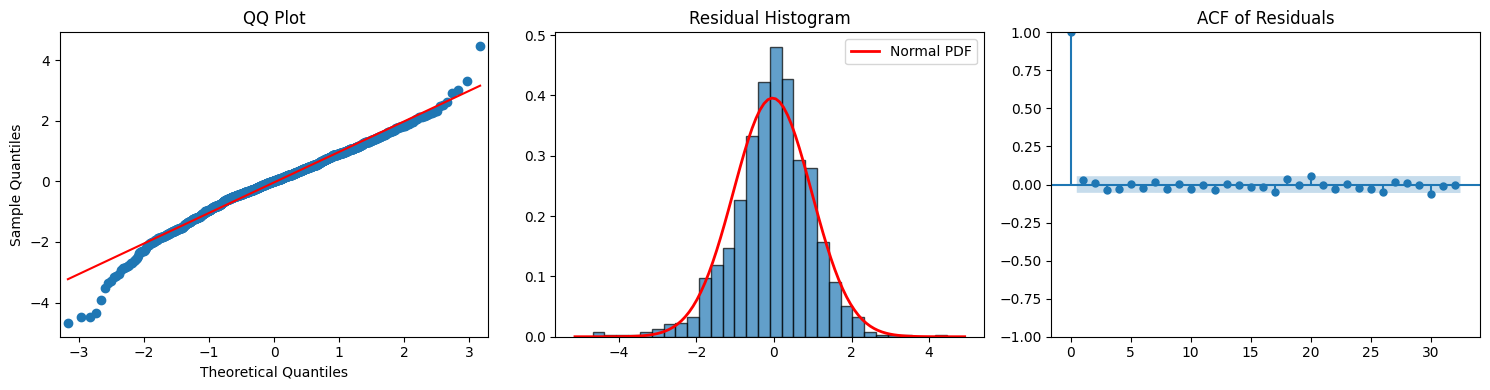

{'ljung_box_pvalue': np.float64(0.723),
 'arch_test_pvalue': np.float64(0.205),
 'jarque_bera_pvalue': np.float64(0.0)}

In [9]:
DIA_GARCH.residual_diagnostics()

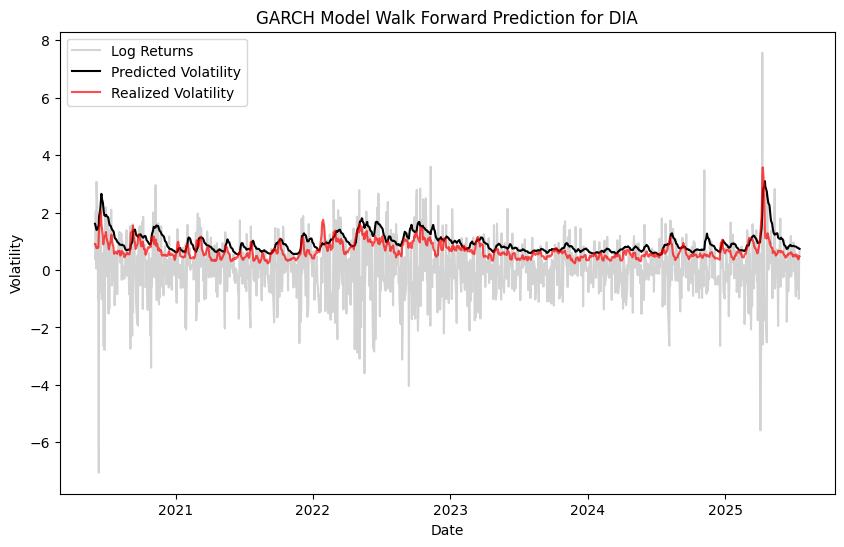

In [10]:
DIA_GARCH.plot_results()

In [169]:
DIA_GARCH.compute_error_metrics()
DIA_GARCH.error_metrics

{'MAE': 0.365,
 'MSE': 0.215,
 'RMSE': np.float64(0.463),
 'QLIKE': np.float64(0.447)}

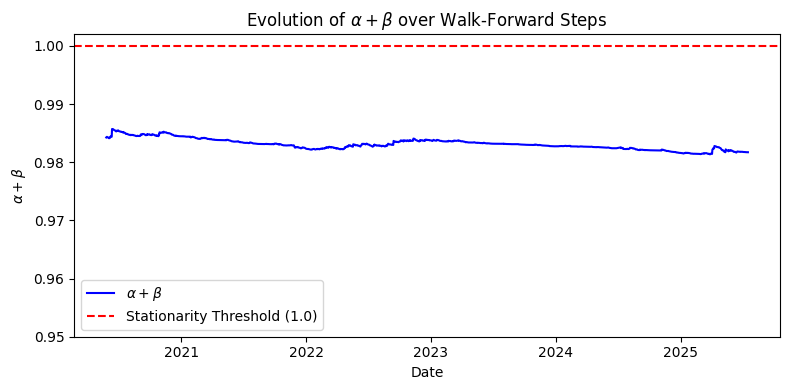

In [170]:
DIA_GARCH.plot_alpha_beta_sum()

## Ticker: SPY; Sector: ETF, Clustering Score: 1.528

In [117]:
sd = stock_data("SPY")
SPY_df = sd.load_data(con)

In [118]:
SPY_GARCH = GARCHWalkForward(SPY_df, ticker ="SPY")
SPY_GARCH.fit_garch()

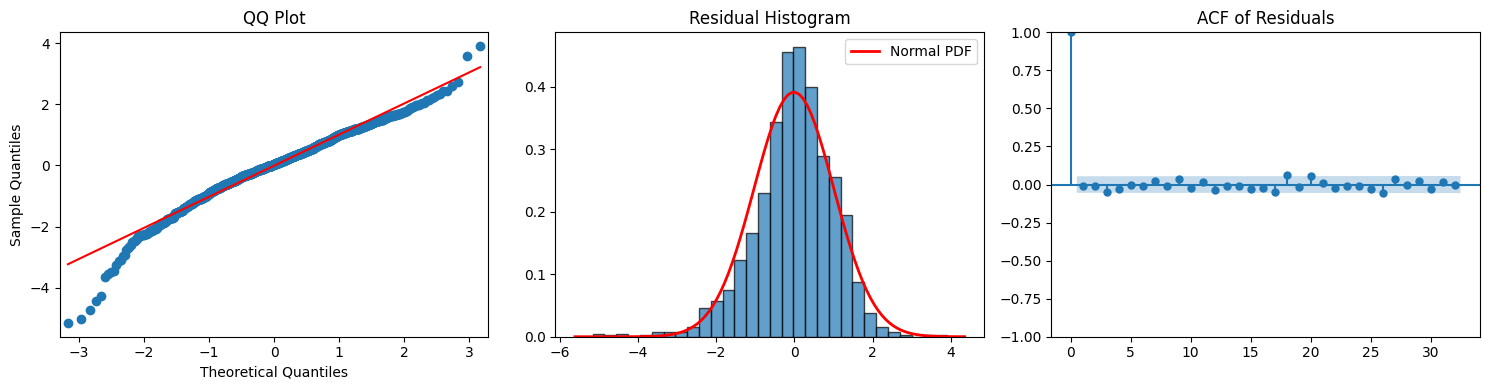

{'ljung_box_pvalue': np.float64(0.651),
 'arch_test_pvalue': np.float64(0.243),
 'jarque_bera_pvalue': np.float64(0.0)}

In [119]:
SPY_GARCH.residual_diagnostics()

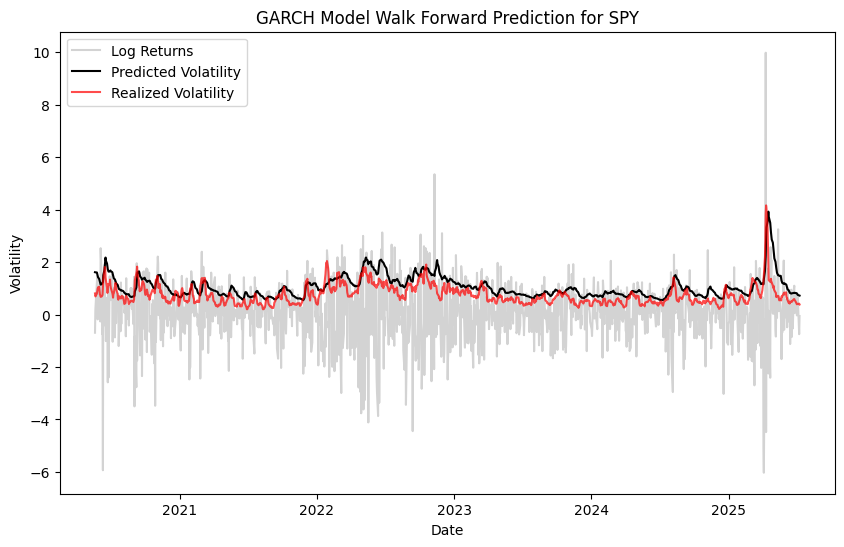

In [120]:
SPY_GARCH.plot_results()

In [121]:
SPY_GARCH.compute_error_metrics()

{'MAE': 0.417,
 'MSE': 0.285,
 'RMSE': np.float64(0.534),
 'QLIKE': np.float64(0.624)}

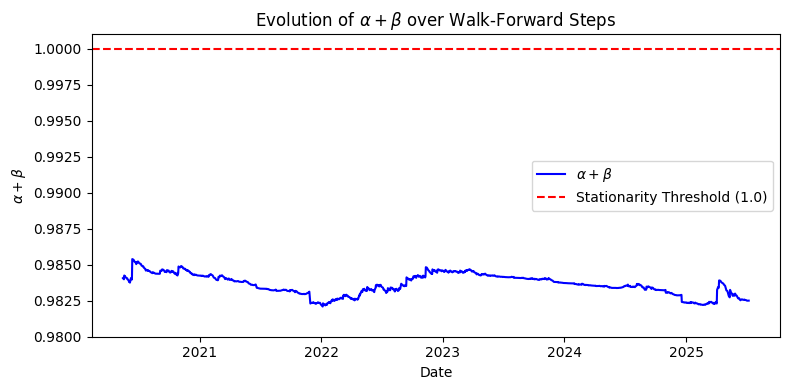

In [122]:
SPY_GARCH.plot_alpha_beta_sum()

## Ticker: GS; Sector: Finance; Clustering Score: 1.069

In [123]:
sd = stock_data("GS")
GS_df = sd.load_data(con)

In [124]:
GS_GARCH = GARCHWalkForward(GS_df, ticker="GS")
GS_GARCH.fit_garch()

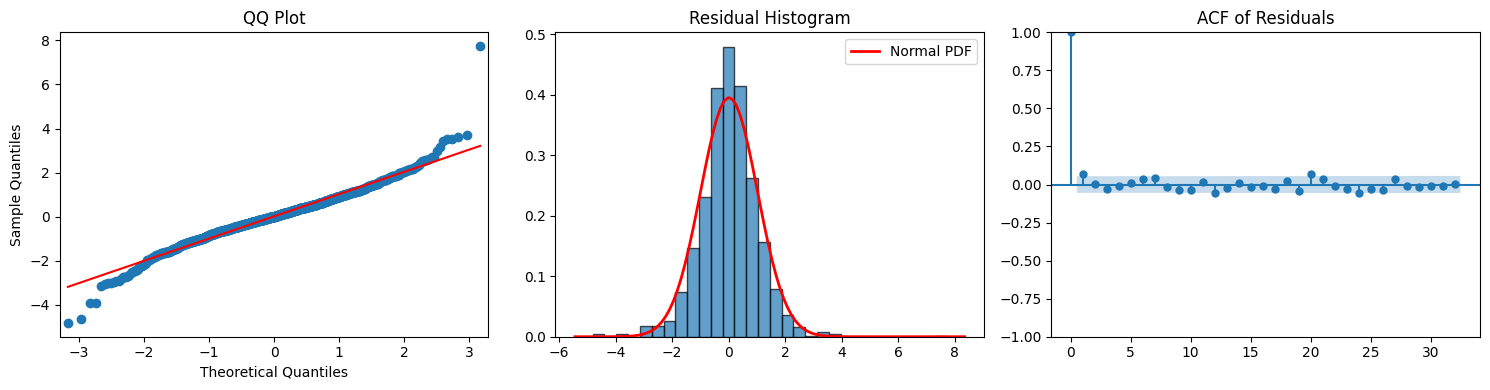

{'ljung_box_pvalue': np.float64(0.097),
 'arch_test_pvalue': np.float64(0.575),
 'jarque_bera_pvalue': np.float64(0.0)}

In [125]:
GS_GARCH.residual_diagnostics()

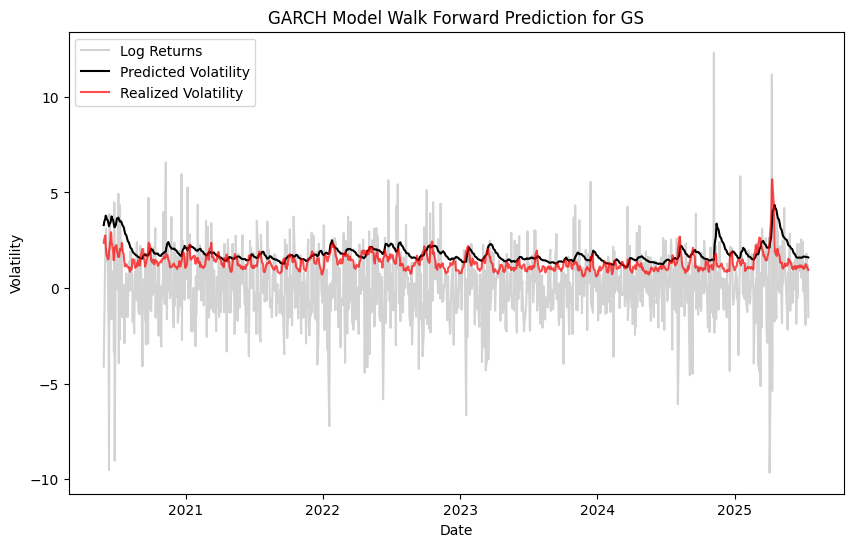

In [126]:
GS_GARCH.plot_results()

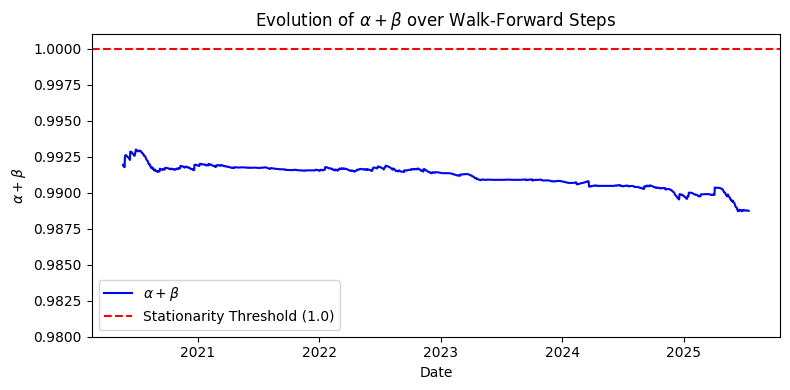

In [128]:
GS_GARCH.plot_alpha_beta_sum()

## Observations for high clustering stocks
The following observations are made from the analysis of the walk-forward GARCH(1,1) model on representative high clustering stocks, DIA, SPY, and GS
- Residual Diagnostics:
The standardized residuals pass both the Ljung-Box test and the ARCH LM test with p-values > 0.05. This indicates that the residuals exhibit no significant autocorrelation and show no remaining conditional heteroskedasticity, i.e., they are uncorrelated and homoskedastic. These findings are further supported by the ACF plot of the residuals, which shows no significant lags.

- Normality:
The residuals fail the Jarque-Bera test, indicating deviation from normality. This is visually confirmed by the Q-Q plot, which shows heavy tails and deviations at the extremes, and the residual histogram, where the empirical distribution is more peaked and has fatter tails than the standard normal overlay.

- Persistence of Volatility:
The evolution of the GARCH parameters over time shows that the sum $\alpha + \beta$ remains close to 1 throughout the walk-forward period. This indicates a high degree of volatility persistence, a common feature in financial return series, and confirms the stability and suitability of the GARCH(1,1) specification for these stocks.

- Forecast Performance:
The predicted volatility (black line) tracks the realized volatility (red line) reasonably well over time. This alignment suggests that the walk-forward GARCH model provides effective short-term volatility forecasts for high clustering stocks.

# Low clustering stocks

## Ticker: XOM; Sector: Commodity; Clustering Score: 0.038

In [10]:
sd = stock_data("XOM")
XOM_df = sd.load_data(con)

In [11]:
XOM_GARCH = GARCHWalkForward(XOM_df, ticker="XOM")
XOM_GARCH.fit_garch()

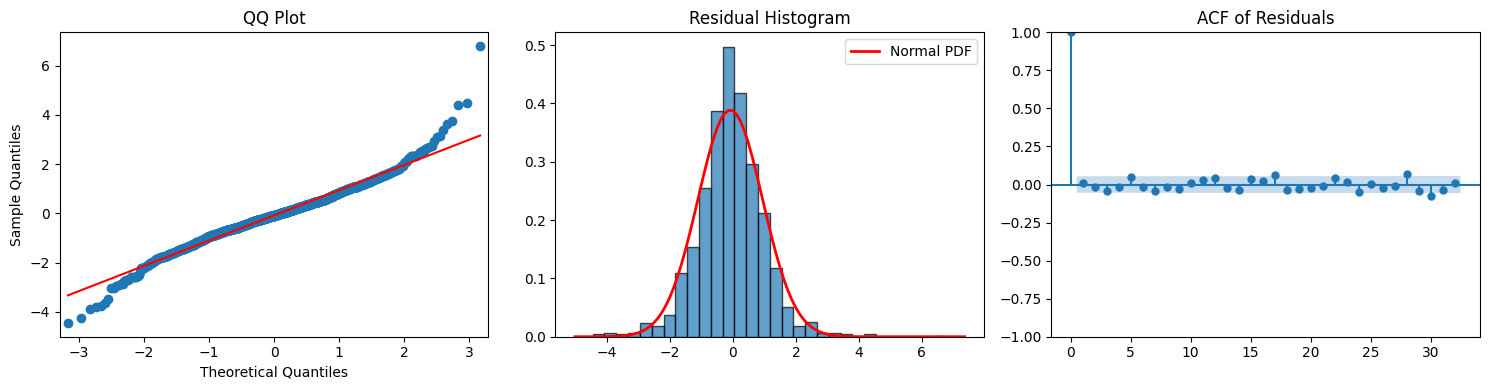

{'ljung_box_pvalue': np.float64(0.366),
 'arch_test_pvalue': np.float64(0.0),
 'jarque_bera_pvalue': np.float64(0.0)}

In [12]:
XOM_GARCH.residual_diagnostics()

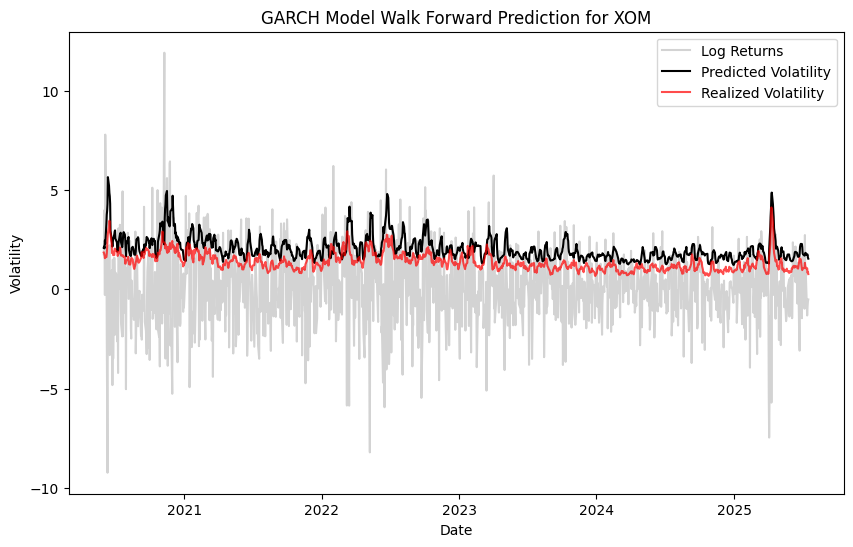

In [13]:
XOM_GARCH.plot_results()

In [14]:
XOM_GARCH.compute_error_metrics()

{'MAE': 0.852,
 'MSE': 1.242,
 'RMSE': np.float64(1.115),
 'QLIKE': np.float64(1.973)}

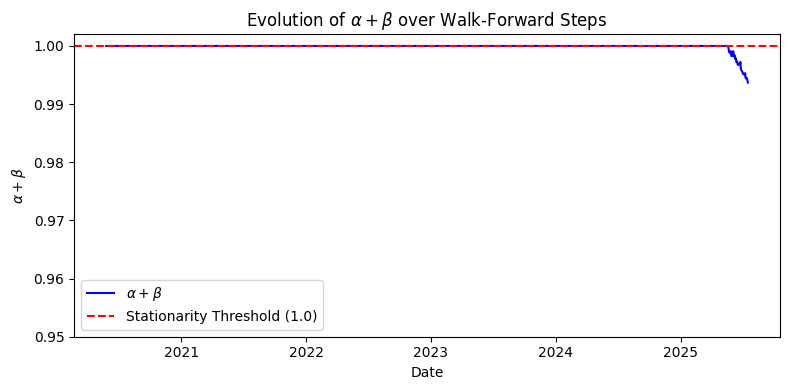

In [15]:
XOM_GARCH.plot_alpha_beta_sum()

In [16]:
XOM_GARCH.fit_params

,mu,omega,alpha[1],beta[1],aic,bic,alpha_plus_beta
date,,,,,,,
2020-05-26,0.235466,1.005278,0.783679,0.216321,19972.750459,19998.954518,1.000000
2020-05-27,0.235942,1.003086,0.782241,0.217759,19978.321101,20004.525934,1.000000
2020-05-28,0.236065,1.002600,0.782044,0.217956,19982.149093,20008.354698,1.000000
2020-05-29,0.235632,1.001990,0.781333,0.218667,19987.999657,20014.206035,1.000000
2020-06-01,0.235614,1.001559,0.781137,0.218863,19991.982189,20018.189341,1.000000
...,...,...,...,...,...,...,...
2025-07-11,0.220263,0.937898,0.681699,0.312709,25390.806439,25417.899978,0.994408
2025-07-14,0.220367,0.937898,0.681951,0.312514,25393.494747,25420.588904,0.994465
2025-07-15,0.220072,0.938335,0.681611,0.312554,25397.256069,25424.350846,0.994165


## Ticker: MSFT; Sector: Technology; Clustering Score: 0.034

In [17]:
sd = stock_data("MSFT")
MSFT_df = sd.load_data(con)

In [18]:
MSFT_GARCH = GARCHWalkForward(MSFT_df, ticker="MSFT")
MSFT_GARCH.fit_garch()

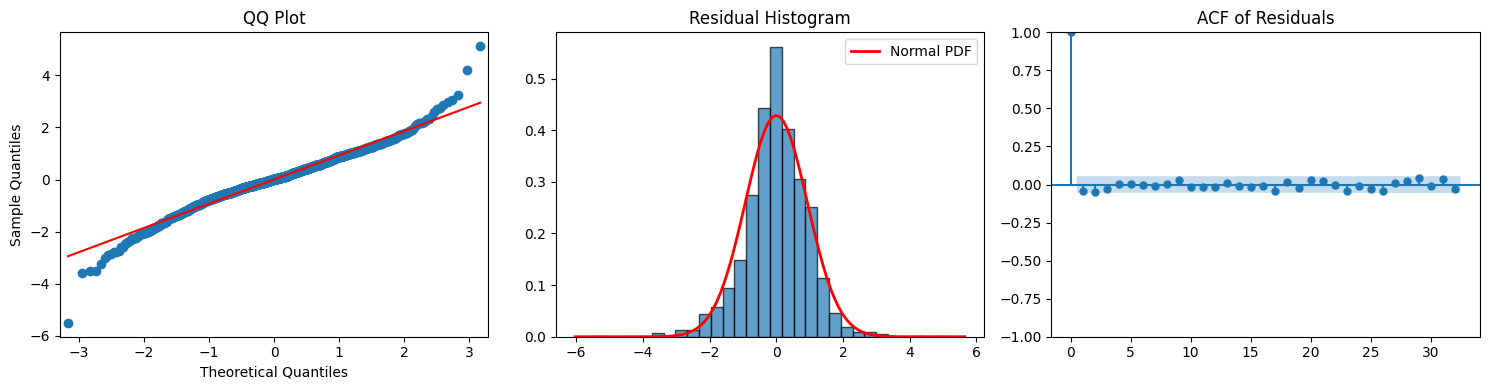

{'ljung_box_pvalue': np.float64(0.651),
 'arch_test_pvalue': np.float64(0.934),
 'jarque_bera_pvalue': np.float64(0.0)}

In [19]:
MSFT_GARCH.residual_diagnostics()

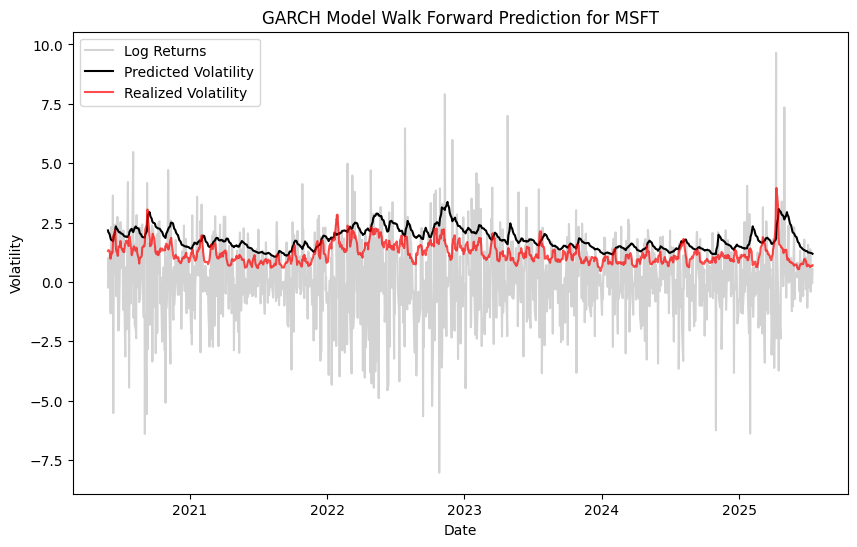

In [20]:
MSFT_GARCH.plot_results()

In [22]:
MSFT_GARCH.compute_error_metrics()

{'MAE': 0.721,
 'MSE': 0.723,
 'RMSE': np.float64(0.851),
 'QLIKE': np.float64(1.685)}

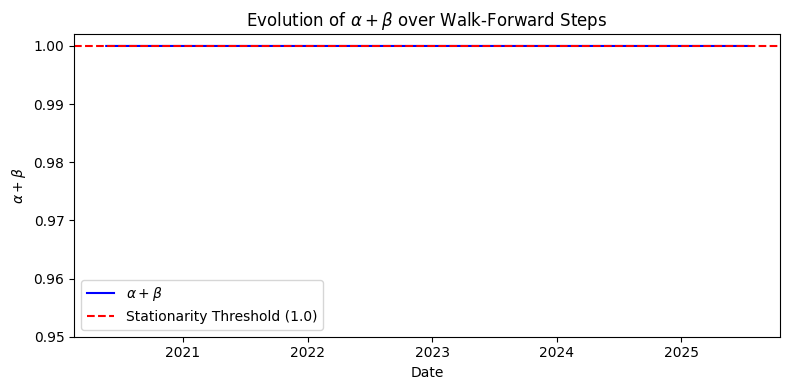

In [23]:
MSFT_GARCH.plot_alpha_beta_sum()

In [24]:
MSFT_GARCH.fit_params

,mu,omega,alpha[1],beta[1],aic,bic,alpha_plus_beta
date,,,,,,,
2020-05-21,0.064387,0.051742,0.083471,0.916531,20888.857904,20915.060416,1.000001
2020-05-22,0.064242,0.051907,0.083678,0.916323,20892.674660,20918.877945,1.000001
2020-05-26,0.064175,0.052145,0.083974,0.916026,20896.137871,20922.341930,1.000000
2020-05-27,0.064013,0.052328,0.084204,0.915796,20899.789661,20925.994493,1.000000
2020-05-28,0.063939,0.052576,0.084517,0.915483,20903.114298,20929.319904,1.000000
...,...,...,...,...,...,...,...
2025-07-09,0.072359,0.046094,0.080206,0.919794,25825.218974,25852.311274,1.000000
2025-07-10,0.072685,0.046083,0.080183,0.919817,25828.605950,25855.698869,1.000000
2025-07-11,0.072618,0.046095,0.080237,0.919763,25830.999792,25858.093331,1.000000


## Ticker: QQQ; Sector: ETF; Clustering Score:0.034

In [25]:
sd = stock_data("QQQ")
QQQ_df = sd.load_data(con)

In [26]:
QQQ_GARCH = GARCHWalkForward(QQQ_df, ticker="QQQ")
QQQ_GARCH.fit_garch()

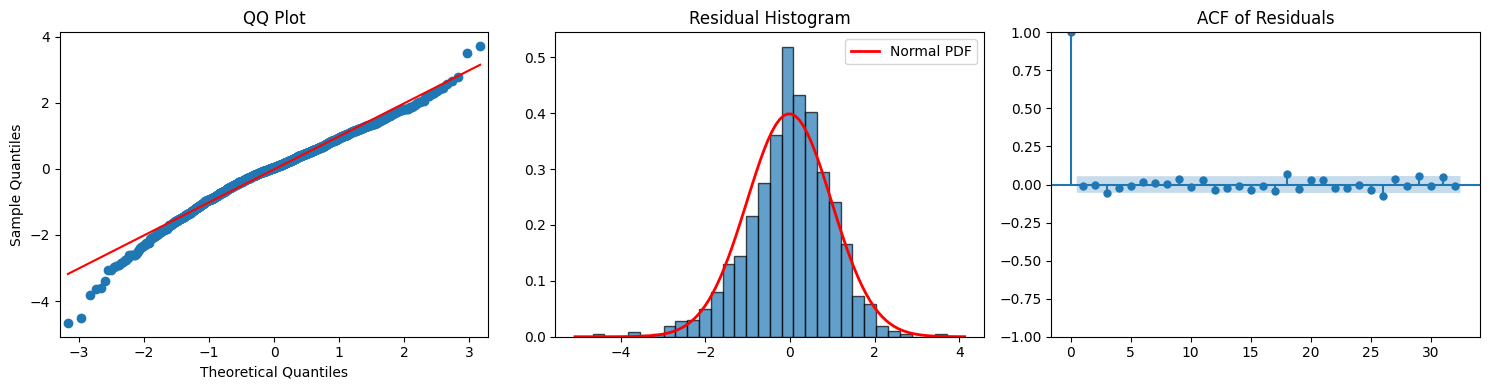

{'ljung_box_pvalue': np.float64(0.63),
 'arch_test_pvalue': np.float64(0.112),
 'jarque_bera_pvalue': np.float64(0.0)}

In [27]:
QQQ_GARCH.residual_diagnostics()

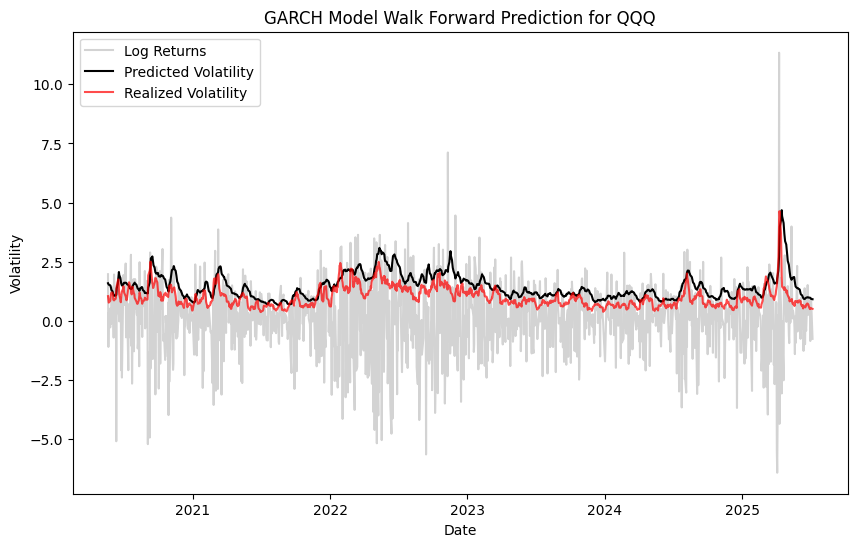

In [28]:
QQQ_GARCH.plot_results()

In [29]:
QQQ_GARCH.compute_error_metrics()

{'MAE': 0.558,
 'MSE': 0.492,
 'RMSE': np.float64(0.701),
 'QLIKE': np.float64(1.233)}

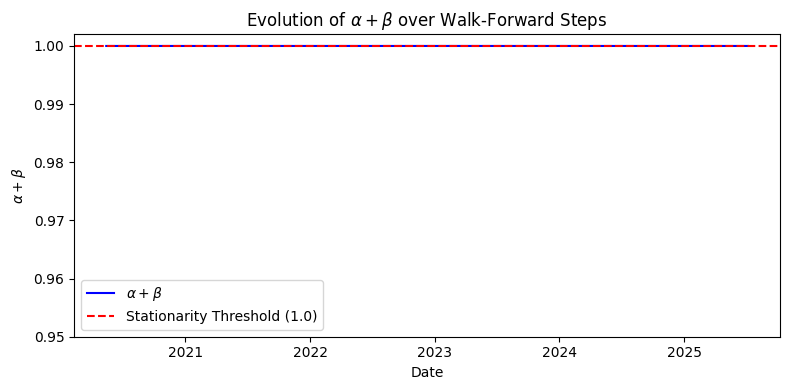

In [30]:
QQQ_GARCH.plot_alpha_beta_sum()

In [31]:
QQQ_GARCH.fit_params

,mu,omega,alpha[1],beta[1],aic,bic,alpha_plus_beta
date,,,,,,,
2020-05-14,0.090581,0.037039,0.163390,0.836610,17898.225942,17924.424583,1.0
2020-05-15,0.090661,0.037072,0.163503,0.836497,17901.521801,17927.721217,1.0
2020-05-18,0.090729,0.037123,0.163672,0.836328,17904.474784,17930.674974,1.0
2020-05-19,0.090870,0.037106,0.163612,0.836388,17908.476012,17934.676976,1.0
2020-05-20,0.090893,0.037148,0.163761,0.836239,17911.283826,17937.485564,1.0
...,...,...,...,...,...,...,...
2025-06-30,0.089904,0.034368,0.151711,0.848289,22348.532237,22375.620819,1.0
2025-07-01,0.090054,0.034360,0.151731,0.848269,22350.586861,22377.676063,1.0
2025-07-02,0.089851,0.034357,0.151719,0.848281,22353.295812,22380.385634,1.0


## Observations for low clustering stocks

The following observations are made from the analysis of the walk-forward GARCH(1,1) model on representative low clustering stocks, XOM, MSFT, and QQQ:
- Residual Diagnostics: The standardized residuals show mixed results across the three stocks. While MSFT and QQQ pass both the Ljung-Box test and ARCH LM test with p-values > 0.05, XOM fails the ARCH LM test with a p-value of 0, indicating significant remaining conditional heteroskedasticity. The ACF plots generally confirm no significant lags beyond lag 0.
- Normality: The residuals fail the Jarque-Bera test, with Q-Q plots showing heavy tails and deviations at extremes, and histograms displaying peaked distributions with fatter tails than the normal overlay.
- Persistence of Volatility: The α+β evolution shows significant parameter instability, with notable overshoots above the stationarity threshold of 1.0, particularly in XOM and QQQ. These overshoots indicate convergence difficulties and numerical instability during walk-forward estimation. Even when α+β equals exactly 1.0, this boundary condition suggests constrained optimization rather than stable interior solutions, reflecting the model's struggle to fit persistent volatility patterns in weakly clustered return series.
- Forecast Performance: The predicted volatility shows mixed performance in tracking realized volatility. XOM and QQQ exhibit systematic under- or over-prediction during volatile periods, while MSFT shows better but still imperfect alignment. This weaker performance aligns with the negative delta metrics for low clustering stocks, suggesting historical volatility may be more effective for assets with weak volatility clustering patterns.
RetryClaude can make mistakes. Please double-check responses. Sonnet 4